In [1]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('winequality-red.csv')
print(df_wine.shape)
df_wine.describe().transpose()

(1599, 12)


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [2]:
target_column = ['quality'] 
predictors = list(set(list(df_wine.columns))-set(target_column))
print(predictors)

['density', 'total sulfur dioxide', 'alcohol', 'citric acid', 'sulphates', 'volatile acidity', 'free sulfur dioxide', 'chlorides', 'residual sugar', 'pH', 'fixed acidity']


# Padronização

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

transformer = StandardScaler()
le = LabelEncoder()

df_std = df_wine.copy()

df_std[predictors] = transformer.fit_transform(df_wine[predictors])
df_std[target_column] = le.fit_transform(df_std[target_column].values.ravel())


df_std.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,3.554936e-16,1.000313,-2.137045,-0.700719,-0.241094,0.505795,4.355149
volatile acidity,1599.0,1.733031e-16,1.000313,-2.278280,-0.769931,-0.043689,0.626688,5.877976
citric acid,1599.0,-8.887339e-17,1.000313,-1.391472,-0.929318,-0.056360,0.765247,3.743574
residual sugar,1599.0,-1.244227e-16,1.000313,-1.162696,-0.453218,-0.240375,0.043416,9.195681
chlorides,1599.0,3.821556e-16,1.000313,-1.603945,-0.371229,-0.179946,0.053845,11.127035
free sulfur dioxide,1599.0,-6.221137e-17,1.000313,-1.422500,-0.848716,-0.179300,0.490115,5.367284
total sulfur dioxide,1599.0,4.443669e-17,1.000313,-1.230584,-0.744040,-0.257497,0.472318,7.375154
density,1599.0,-3.473172e-14,1.000313,-3.538731,-0.607756,0.001760,0.576825,3.680055
pH,1599.0,2.861723e-15,1.000313,-3.700401,-0.655141,-0.007213,0.575922,4.528282
sulphates,1599.0,6.754377e-16,1.000313,-1.936507,-0.638220,-0.225128,0.424016,7.918677


In [4]:
from sklearn.model_selection import train_test_split

X_std = df_std[predictors].values
y_std = df_std[target_column].values

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, test_size=0.30, random_state=12, shuffle=True)
print(X_train_std.shape)
print(X_test_std.shape)

(1119, 11)
(480, 11)


In [5]:
import numpy as np

#Específico do Keras
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

#Métricas
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, mean_squared_error
%matplotlib inline

In [6]:
mlp_std = Sequential()
mlp_std.add(Dense(500, activation='elu', input_dim=11))
mlp_std.add(Dense(200, activation='elu'))
mlp_std.add(Dense(100, activation='elu'))
mlp_std.add(Dense(1,  activation='elu'))

mlp_std.compile(optimizer='adam',
                loss='mean_squared_error',               
                metrics=['mean_squared_error'])

mlp_std.fit(X_train_std, y_train_std, epochs=500, verbose=1)

predict_test_std = mlp_std.predict(X_test_std)

Epoch 1/500
35/35 [==============================] - 0s 1ms/step - loss: 2.9940 - mean_squared_error: 2.9940
Epoch 2/500
35/35 [==============================] - 0s 968us/step - loss: 0.6320 - mean_squared_error: 0.6320
Epoch 3/500
35/35 [==============================] - 0s 909us/step - loss: 0.4776 - mean_squared_error: 0.4776
Epoch 4/500
35/35 [==============================] - 0s 909us/step - loss: 0.5066 - mean_squared_error: 0.5066
Epoch 5/500
35/35 [==============================] - 0s 939us/step - loss: 0.4488 - mean_squared_error: 0.4488
Epoch 6/500
35/35 [==============================] - 0s 909us/step - loss: 0.4645 - mean_squared_error: 0.4645
Epoch 7/500
35/35 [==============================] - 0s 880us/step - loss: 0.4312 - mean_squared_error: 0.4312
Epoch 8/500
35/35 [==============================] - 0s 909us/step - loss: 0.4390 - mean_squared_error: 0.4390
Epoch 9/500
35/35 [==============================] - 0s 909us/step - loss: 0.4275 - mean_squared_error: 0.4275
Epo

In [7]:
# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test_std, predict_test_std))

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_std, predict_test_std))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_std, predict_test_std))

Mean absolute error: 0.50
Mean squared error: 0.52
Coefficient of determination: 0.09


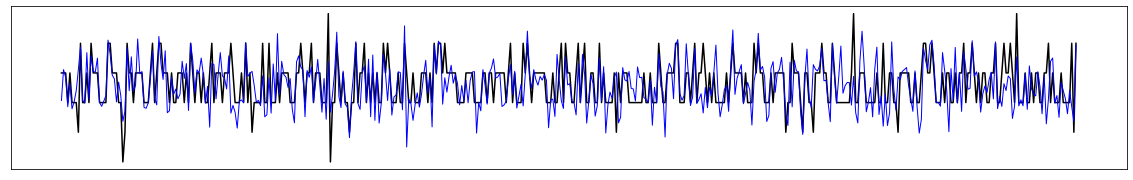

In [8]:
# Plot outputs
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(range(len(y_test_std)), y_test_std,  color='black')
plt.plot(range(len(predict_test_std)), predict_test_std, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

# Normlização

In [9]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder

transformer = Normalizer()
le = LabelEncoder()

df_norm = df_wine.copy()

df_norm[predictors] = transformer.fit_transform(df_wine[predictors])
df_norm[target_column] = le.fit_transform(df_norm[target_column].values.ravel())

df_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,0.219976,0.129545,0.027062,0.114584,0.185734,0.304573,0.686743
volatile acidity,1599.0,0.013716,0.009362,0.001028,0.007091,0.011247,0.017662,0.090784
citric acid,1599.0,0.007081,0.007231,0.000000,0.001912,0.004354,0.010101,0.038751
residual sugar,1599.0,0.063927,0.045598,0.007771,0.033655,0.053330,0.080040,0.486839
chlorides,1599.0,0.002256,0.001676,0.000112,0.001162,0.001884,0.002811,0.020401
free sulfur dioxide,1599.0,0.309385,0.114849,0.021791,0.221418,0.296393,0.386508,0.621347
total sulfur dioxide,1599.0,0.833325,0.119993,0.337742,0.771839,0.857586,0.925253,0.990514
density,1599.0,0.026090,0.013876,0.003402,0.014574,0.023289,0.035886,0.064150
pH,1599.0,0.086685,0.046292,0.010311,0.048717,0.077512,0.118758,0.218226
sulphates,1599.0,0.017026,0.009512,0.001747,0.009409,0.014907,0.023548,0.061545


In [10]:
from sklearn.model_selection import train_test_split

X_norm = df_norm[predictors].values
y_norm = df_norm[target_column].values

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.30, random_state=12)
print(X_train_norm.shape)
print(X_test_norm.shape)

(1119, 11)
(480, 11)


In [11]:
mlp_norm = Sequential()
mlp_norm.add(Dense(500, activation='elu', input_dim=11))
mlp_norm.add(Dense(200, activation='elu'))
mlp_norm.add(Dense(100, activation='elu'))
mlp_norm.add(Dense(1))

mlp_norm.compile(optimizer='adam',
                loss='mean_squared_error',               
                metrics=['mean_squared_error'])

mlp_norm.fit(X_train_norm, y_train_norm, epochs=100, verbose=2)
predict_test_norm = mlp_norm.predict(X_test_norm)

Epoch 1/100
35/35 - 0s - loss: 1.1942 - mean_squared_error: 1.1942
Epoch 2/100
35/35 - 0s - loss: 0.6558 - mean_squared_error: 0.6558
Epoch 3/100
35/35 - 0s - loss: 0.6404 - mean_squared_error: 0.6404
Epoch 4/100
35/35 - 0s - loss: 0.6366 - mean_squared_error: 0.6366
Epoch 5/100
35/35 - 0s - loss: 0.6306 - mean_squared_error: 0.6306
Epoch 6/100
35/35 - 0s - loss: 0.6297 - mean_squared_error: 0.6297
Epoch 7/100
35/35 - 0s - loss: 0.6184 - mean_squared_error: 0.6184
Epoch 8/100
35/35 - 0s - loss: 0.5972 - mean_squared_error: 0.5972
Epoch 9/100
35/35 - 0s - loss: 0.5582 - mean_squared_error: 0.5582
Epoch 10/100
35/35 - 0s - loss: 0.5714 - mean_squared_error: 0.5714
Epoch 11/100
35/35 - 0s - loss: 0.5848 - mean_squared_error: 0.5848
Epoch 12/100
35/35 - 0s - loss: 0.5139 - mean_squared_error: 0.5139
Epoch 13/100
35/35 - 0s - loss: 0.5173 - mean_squared_error: 0.5173
Epoch 14/100
35/35 - 0s - loss: 0.5155 - mean_squared_error: 0.5155
Epoch 15/100
35/35 - 0s - loss: 0.4915 - mean_squared_err

In [12]:
# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test_norm, predict_test_norm))

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_norm, predict_test_norm))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_norm, predict_test_norm))

Mean absolute error: 0.51
Mean squared error: 0.40
Coefficient of determination: 0.29


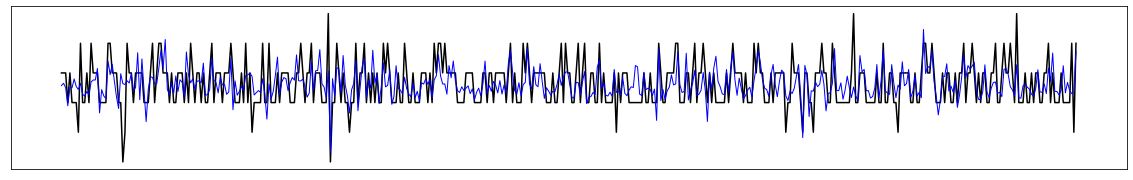

In [13]:
# Plot outputs
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(range(len(y_test_norm)), y_test_norm,  color='black')
plt.plot(range(len(predict_test_norm)), predict_test_norm, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()